In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Date_1'] = df['Date'].dt.strftime('%d-%m-%Y')
print(df[['Date', 'Date_1']].head())


        Date      Date_1
0 1749-01-31  31-01-1749
1 1749-02-28  28-02-1749
2 1749-03-31  31-03-1749
3 1749-04-30  30-04-1749
4 1749-05-31  31-05-1749


In [ ]:
from scipy.stats import pearsonr

df_corr = df[['Monthly Mean Total Sunspot Number']].dropna().copy()
df_corr['Timestamp'] = df_corr.index.astype(np.int64) // 10**9

corr, p = pearsonr(df_corr['Timestamp'], df_corr['Monthly Mean Total Sunspot Number'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p:.4f}")
if p < 0.05:
    print("Conclusion: There is a significant linear relationship between time and sunspot numbers.")
else:
    print("Conclusion: No significant relationship between time and sunspot numbers.")

NameError: name 'np' is not defined

: 

In [ ]:
df_recent = df[(df.index.year > 1880) & (df.index.year < 1920)].copy()
df_recent['Year'] = df_recent.index.year
df_recent['Month'] = df_recent.index.month


df_recent['Period'] = (df_recent['Year'] // 11) * 11


df_grouped = df_recent.groupby(['Period', 'Month'])['Monthly Mean Total Sunspot Number'].mean().reset_index()


g = sns.FacetGrid(df_grouped, col="Period", col_wrap=6, height=4, aspect=1)
g.map(sns.lineplot, "Month", "Monthly Mean Total Sunspot Number", color="mediumblue")
g.set_axis_labels("Month", "Avg. Sunspot Number")
g.set(xticks=range(1, 13))
g.set_titles(col_template="{col_name}")

for ax, period in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Period: {int(period)}–{int(period)+10}", fontsize=10)

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Monthly Average Sunspot Numbers by 11-Year Period", fontsize=10)
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("Sunspots.csv")

df.columns = ['Index', 'Date', 'Sunspot']
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [ ]:
annual_df = df.groupby('Year')['Sunspot'].mean().reset_index()
annual_df.columns = ['Year', 'Sunspot']

In [ ]:
start_year = annual_df['Year'].min()
annual_df['Cycle'] = ((annual_df['Year'] - start_year) // 11) + 1
annual_df['Cycle_Label'] = annual_df['Cycle'].apply(
    lambda x: f"{start_year + (x - 1) * 11}-{start_year + x * 11 - 1}"
)

In [ ]:
for lag in range(1, 12): 
    annual_df[f'Sunspot_lag{lag}'] = annual_df['Sunspot'].shift(lag)

In [ ]:
annual_df['MA_3'] = annual_df['Sunspot'].rolling(window=3).mean()
annual_df['MA_5'] = annual_df['Sunspot'].rolling(window=5).mean()
annual_df['Trend_11'] = annual_df['Sunspot'] - annual_df['Sunspot'].rolling(window=11).mean()
print(annual_df.tail(10))

     Year     Sunspot  Cycle Cycle_Label  Sunspot_lag1  Sunspot_lag2  \
263  2012   84.391667     24   2002-2012     80.758333     24.900000   
264  2013   93.708333     25   2013-2023     84.391667     80.758333   
265  2014  113.608333     25   2013-2023     93.708333     84.391667   
266  2015   69.783333     25   2013-2023    113.608333     93.708333   
267  2016   39.825000     25   2013-2023     69.783333    113.608333   
268  2017   21.816667     25   2013-2023     39.825000     69.783333   
269  2018    7.008333     25   2013-2023     21.816667     39.825000   
270  2019    3.583333     25   2013-2023      7.008333     21.816667   
271  2020    8.625000     25   2013-2023      3.583333      7.008333   
272  2021   10.400000     25   2013-2023      8.625000      3.583333   

     Sunspot_lag3  Sunspot_lag4  Sunspot_lag5  Sunspot_lag6  Sunspot_lag7  \
263      4.750000      4.150000     12.633333     24.625000     45.725000   
264     24.900000      4.750000      4.150000     12.

In [ ]:
model_df = annual_df.dropna().reset_index(drop=True)

print(annual_df.head(10))

   Year     Sunspot  Cycle Cycle_Label  Sunspot_lag1  Sunspot_lag2  \
0  1749  134.875000      1   1749-1759           NaN           NaN   
1  1750  139.000000      1   1749-1759    134.875000           NaN   
2  1751   79.441667      1   1749-1759    139.000000    134.875000   
3  1752   79.666667      1   1749-1759     79.441667    139.000000   
4  1753   51.125000      1   1749-1759     79.666667     79.441667   
5  1754   20.358333      1   1749-1759     51.125000     79.666667   
6  1755   15.933333      1   1749-1759     20.358333     51.125000   
7  1756   16.983333      1   1749-1759     15.933333     20.358333   
8  1757   54.041667      1   1749-1759     16.983333     15.933333   
9  1758   79.341667      1   1749-1759     54.041667     16.983333   

   Sunspot_lag3  Sunspot_lag4  Sunspot_lag5  Sunspot_lag6  Sunspot_lag7  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2   

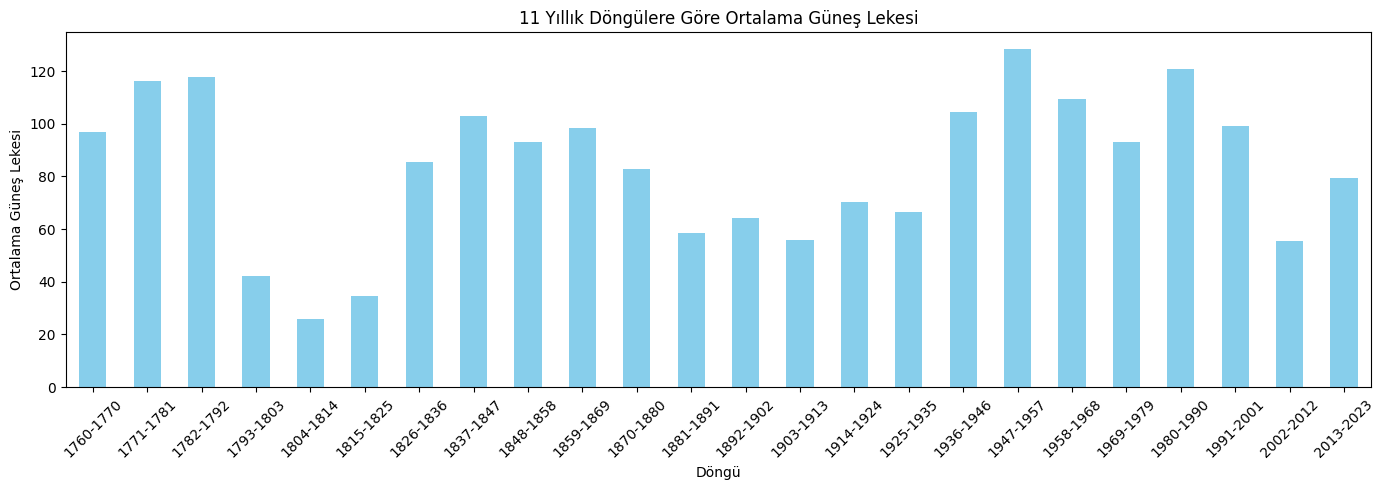

In [ ]:
cycle_means = model_df.groupby('Cycle_Label')['Sunspot'].mean()

plt.figure(figsize=(14, 5))
cycle_means.plot(kind='bar', color='skyblue')
plt.title('11 Yıllık Döngülere Göre Ortalama Güneş Lekesi')
plt.ylabel('Ortalama Güneş Lekesi')
plt.xlabel('Döngü')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()